In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../../Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 02')

In [78]:
df.head(40)

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987
5,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,193,159.619165,170.268045
6,2021,September,Ballarat,Ballarat,A Crimes against the person,A30 Sexual offences,A30 Sexual offences,189,156.310996,166.739173
7,2021,September,Ballarat,Ballarat,A Crimes against the person,A40 Abduction and related offences,A41 Abduction,5,4.135212,4.411089
8,2021,September,Ballarat,Ballarat,A Crimes against the person,A40 Abduction and related offences,A42 False imprisonment,5,4.135212,4.411089
9,2021,September,Ballarat,Ballarat,A Crimes against the person,A50 Robbery,A51 Aggravated robbery,16,13.232677,14.115486


## ANALYSIS OF "OFFENCE  TYPE" OVER 10 YEARS FOR EACH POLICE REGION

In [79]:
cdf = df.groupby(['Offence Division','Year'])['Incidents Recorded'].agg(['sum','mean','median',np.var,np.std])
cdf.head(40)

sum        mean  median  \
Offence Division                     Year                               
A Crimes against the person          2012   45058   32.913075     8.0   
                                     2013   48291   33.983814     8.0   
                                     2014   49122   34.544304    10.0   
                                     2015   50791   35.642807    10.0   
                                     2016   57548   39.121686    11.0   
                                     2017   60361   41.371487    12.0   
                                     2018   61408   42.614851    12.0   
                                     2019   64028   43.794802    12.0   
                                     2020   63821   44.014483    12.0   
                                     2021   64967   43.985782    13.0   
B Property and deception offences    2012  230668  157.560109    21.5   
                                     2013  226184  149.790728    21.0   
                                     2014  228654  153.459060    22.0   
                                     2015  231770  155.759409    24.0   
                                     2016  266657  176.011221    26.0   
                                     2017  242370  163.322102    27.0   
                                     2018  232635  157.718644    26.0   
                                     2019  239662  163.703552    27.0   
                                     2020  223468  155.078418    28.0   
                                     2021  194327  135.703212    24.5   
C Drug offences                      2012   11976   33.735211     9.0   
                                     2013   13090   36.666667     9.0   
                                     2014   14074   38.453552    10.0   
                                     2015   15455   41.770270    11.0   
                                     2016   15105   38.631714     9.0   
                                     2017   14891   39.186842     9.0   
                                     2018   15193   39.360104     7.0   
                                     2019   16533   43.738095     8.0   
                                     2020   18621   48.240933    10.0   
                                     2021   14820   38.593750     8.0   
D Public order and security offences 2012   26035   31.905637     6.0   
                                     2013   27878   33.669082     7.0   
                                     2014   26031   32.176761     7.0   
                                     2015   25513   31.614622     7.0   
                                     2016   23924   27.818605     6.0   
                                     2017   24389   28.794569     7.0   
                                     2018   23688   29.172414     7.0   
                                     2019   23483   29.171429     7.0   
                                     2020   18471   23.175659     6.0   
                                     2021   17735   22.058458     6.0   

                                                     var         std  
Offence Division                     Year                             
A Crimes against the person          2012    4185.437614   64.694958  
                                     2013    4285.014527   65.460022  
                                     2014    4286.761934   65.473368  
                                     2015    4500.739599   67.087552  
                                     2016    5721.370897   75.639744  
                                     2017    6570.285771   81.057299  
                                     2018    6961.838363   83.437632  
                                     2019    7479.777167   86.485705  
                                     2020    7531.045339   86.781596  
                                     2021    7496.852779   86.584368  
B Property and deception offences    2012  110658.168633  332.653226  
                                     2013   97287.640736

In [80]:
Total = df.groupby(['Year'])['Incidents Recorded'].agg('sum')
Total.describe()

count        10.000000
mean     371043.600000
std       29772.239199
min      330937.000000
25%      347846.750000
50%      369855.000000
75%      393191.750000
max      410774.000000
Name: Incidents Recorded, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

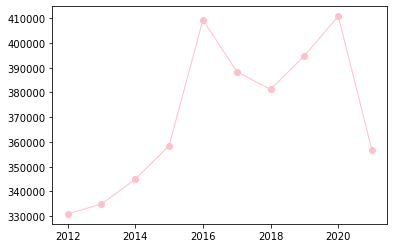

In [81]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.show

In [82]:
Person = df[df['Offence Division']=='A Crimes against the person']
Person = Person.groupby(['Year'])['Incidents Recorded'].sum()
Person

Year
2012    45058
2013    48291
2014    49122
2015    50791
2016    57548
2017    60361
2018    61408
2019    64028
2020    63821
2021    64967
Name: Incidents Recorded, dtype: int64

In [83]:
Property = df[df['Offence Division']=='B Property and deception offences']
Property = Property.groupby(['Year'])['Incidents Recorded'].sum()
Property

Year
2012    230668
2013    226184
2014    228654
2015    231770
2016    266657
2017    242370
2018    232635
2019    239662
2020    223468
2021    194327
Name: Incidents Recorded, dtype: int64

In [84]:
Drugs = df[df['Offence Division']=='C Drug offences']
Drugs = Drugs.groupby(['Year'])['Incidents Recorded'].sum()
Drugs

Year
2012    11976
2013    13090
2014    14074
2015    15455
2016    15105
2017    14891
2018    15193
2019    16533
2020    18621
2021    14820
Name: Incidents Recorded, dtype: int64

In [85]:
Public = df[df['Offence Division']=='D Public order and security offences']
Public = Public.groupby(['Year'])['Incidents Recorded'].sum()
Public

Year
2012    26035
2013    27878
2014    26031
2015    25513
2016    23924
2017    24389
2018    23688
2019    23483
2020    18471
2021    17735
Name: Incidents Recorded, dtype: int64

In [86]:
Justice = df[df['Offence Division']=='E Justice procedures offences']
Justice = Justice.groupby(['Year'])['Incidents Recorded'].sum()
Justice

Year
2012    16153
2013    18634
2014    26243
2015    34144
2016    45374
2017    45598
2018    47575
2019    50321
2020    53411
2021    51950
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

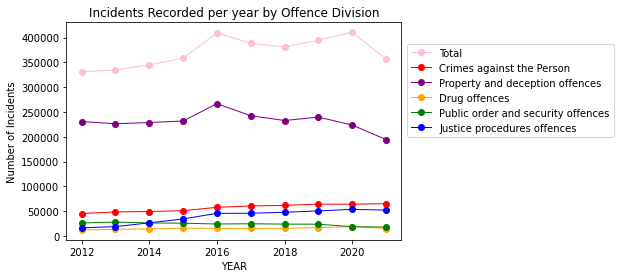

In [87]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,Property, marker="o", color="purple", linewidth=1, label="Property and deception offences")
plt.plot(x,Person, marker="o", color="red", linewidth=1, label="Crimes against the Person")
plt.plot(x,Drugs, marker="o", color="orange", linewidth=1, label="Drug offences")
plt.plot(x,Public, marker="o", color="green", linewidth=1, label="Public order and security offences")
plt.plot(x,Justice, marker="o", color="blue", linewidth=1, label="Justice procedures offences")
plt.legend(loc='lower right', bbox_to_anchor=(1.65, 0.45))
plt.title("Incidents Recorded per year by Offence Division")
plt.xlabel("YEAR")
plt.ylabel("Number of Incidents")
plt.show

In [88]:
SplitProperty = df[df['Offence Division']=='B Property and deception offences']
SplitProperty

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
22,2021,September,Ballarat,Ballarat,B Property and deception offences,B10 Arson,B11 Cause damage by fire,70,57.892961,61.755249
23,2021,September,Ballarat,Ballarat,B Property and deception offences,B10 Arson,B12 Cause a bushfire,2,1.654085,1.764436
24,2021,September,Ballarat,Ballarat,B Property and deception offences,B10 Arson,B19 Other fire related offences,2,1.654085,1.764436
25,2021,September,Ballarat,Ballarat,B Property and deception offences,B20 Property damage,B21 Criminal damage,681,563.215810,600.790354
26,2021,September,Ballarat,Ballarat,B Property and deception offences,B20 Property damage,B22 Graffiti,65,53.757750,57.344160
...,...,...,...,...,...,...,...,...,...,...
50368,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B40 Theft,B49 Other theft,622,415.042972,415.042972
50369,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B50 Deception,B51 Forgery and counterfeiting,29,19.350878,19.350878
50370,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B50 Deception,B52 Possess equipment to make false instrument,1,0.667272,0.667272
50371,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,103,68.728981,68.728981


In [89]:
InciProperty = SplitProperty.groupby(['Offence Subdivision'])['Incidents Recorded'].sum()
InciProperty

Offence Subdivision
B10 Arson                         30142
B20 Property damage              364324
B30 Burglary/Break and enter     417734
B40 Theft                       1317748
B50 Deception                    186375
B60 Bribery                          72
Name: Incidents Recorded, dtype: int64

In [90]:
Damage = SplitProperty[SplitProperty['Offence Subdivision']=='B20 Property damage']
Damage = Damage.groupby(['Year'])['Incidents Recorded'].sum()
Damage

Year
2012    43351
2013    40173
2014    37140
2015    35596
2016    37539
2017    35984
2018    35007
2019    34298
2020    33030
2021    32206
Name: Incidents Recorded, dtype: int64

In [91]:
Theft = SplitProperty[SplitProperty['Offence Subdivision']=='B40 Theft']
Theft = Theft.groupby(['Year'])['Incidents Recorded'].sum()
Theft

Year
2012    127414
2013    122822
2014    127502
2015    130673
2016    153831
2017    135607
2018    134040
2019    141939
2020    132562
2021    111358
Name: Incidents Recorded, dtype: int64

In [92]:
Deception = SplitProperty[SplitProperty['Offence Subdivision']=='B50 Deception']
Deception = Deception.groupby(['Year'])['Incidents Recorded'].sum()
Deception

Year
2012    11363
2013    15002
2014    17012
2015    16749
2016    19679
2017    21281
2018    20794
2019    22932
2020    21951
2021    19612
Name: Incidents Recorded, dtype: int64

In [93]:
Bribery = SplitProperty[SplitProperty['Offence Subdivision']=='B60 Bribery']
Bribery = Bribery.groupby(['Year'])['Incidents Recorded'].sum()
Bribery

Year
2012    20
2013     7
2014     2
2015    20
2016     5
2017     5
2018     3
2019     5
2020     3
2021     2
Name: Incidents Recorded, dtype: int64

In [94]:
Burglary = SplitProperty[SplitProperty['Offence Subdivision']=='B30 Burglary/Break and enter']
Burglary = Burglary.groupby(['Year'])['Incidents Recorded'].sum()
Burglary

Year
2012    45356
2013    44609
2014    43716
2015    45650
2016    51628
2017    46455
2018    39734
2019    37609
2020    33701
2021    29276
Name: Incidents Recorded, dtype: int64

In [95]:
Arson = SplitProperty[SplitProperty['Offence Subdivision']=='B10 Arson']
Arson = Arson.groupby(['Year'])['Incidents Recorded'].sum()
Arson

Year
2012    3164
2013    3571
2014    3282
2015    3082
2016    3975
2017    3038
2018    3057
2019    2879
2020    2221
2021    1873
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

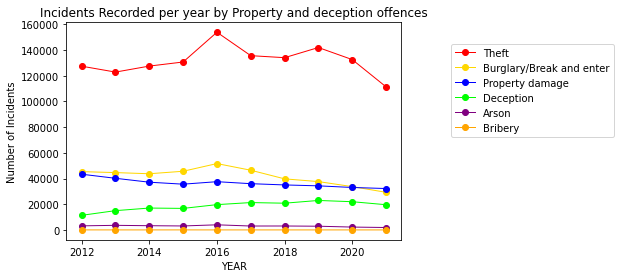

In [96]:
x = np.arange(2012,2022,1)
#plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,Theft, marker="o", color="red", linewidth=1, label="Theft")
plt.plot(x,Burglary, marker="o", color="gold", linewidth=1, label="Burglary/Break and enter")
plt.plot(x,Damage, marker="o", color="blue", linewidth=1, label="Property damage")
plt.plot(x,Deception, marker="o", color="lime", linewidth=1, label="Deception")
plt.plot(x,Arson, marker="o", color="purple", linewidth=1, label="Arson")
plt.plot(x,Bribery, marker="o", color="orange", linewidth=1, label="Bribery")
plt.legend(loc='lower right', bbox_to_anchor=(1.65, 0.45))
plt.title("Incidents Recorded per year by Property and deception offences")
plt.xlabel("YEAR")
plt.ylabel("Number of Incidents")
plt.show

In [121]:
TheftSplit = SplitProperty[SplitProperty['Offence Subdivision']=='B40 Theft']
TheftSplit = TheftSplit.groupby(['Offence Subgroup'])['Incidents Recorded'].sum()
TheftSplit.head(50)

Offence Subgroup
B41 Motor vehicle theft                   142467
B42 Steal from a motor vehicle            492630
B43 Steal from a retail store             181729
B44 Theft of a bicycle                     59087
B45 Receiving or handling stolen goods     60489
B46 Fare evasion                             584
B49 Other theft                           380762
Name: Incidents Recorded, dtype: int64

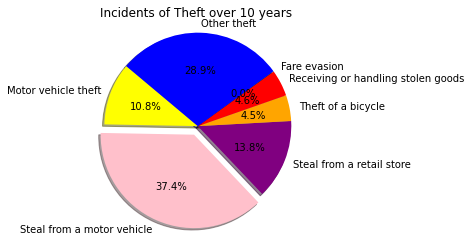

In [122]:
# Generate a pie plot showing the distribution of crime of Theft
pies = ["Motor vehicle theft","Steal from a motor vehicle","Steal from a retail store",'Theft of a bicycle','Receiving or handling stolen goods','Fare evasion','Other theft']
pie_count = TheftSplit
colors = ["yellow","pink","purple","orange","red","green",'blue']
explode = (0,0.1,0,0,0,0,0)
# Tell matplotlib to create a pie chart based upon the above data: 
plt.pie(pie_count, labels=pies, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('Incidents of Theft over 10 years')
plt.show()